**Support Vector Machine using SMO Algorithm**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import math
import pylab as pl
from sklearn import svm
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['mnist_train.csv', 'mnist_test.csv']


In [2]:
temp_df = pd.read_csv('../input/mnist_train.csv')

In [3]:
temp_df.shape

(60000, 785)

In [4]:
new_df = temp_df.iloc[[7]]

In [5]:
new_df.shape

(1, 785)

In [6]:
new_df.iloc[:1]

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
for index, row in temp_df.iterrows():
    #print(index)
    i = 0
    if(row["label"] == 3 or row["label"] == 8):
        if(index!=7):
            new_df = new_df.append(temp_df.loc[[index]])
    

In [8]:
new_df.shape

(11982, 785)

In [9]:
new_df = new_df.iloc[:1000]

In [10]:
new_df.shape

(1000, 785)

In [11]:
for index, row in new_df.iterrows():
    if(row["label"]==8):
        row["label"] = 1
    else: 
        row["label"] = -1

In [12]:
#print(new_df)

In [13]:
train, validate, test = np.split(new_df.sample(frac=1), [int(.6*len(new_df)), int(.8*len(new_df))])

In [14]:
train.shape

(600, 785)

In [15]:
validate.shape

(200, 785)

In [16]:
test.shape

(200, 785)

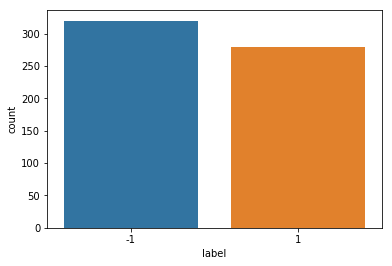

In [17]:
sns.countplot(train['label'])

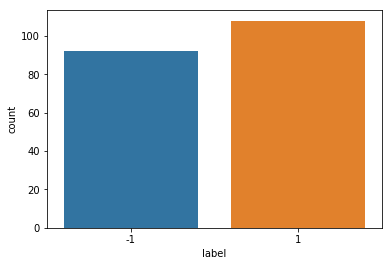

In [18]:
sns.countplot(validate['label'])

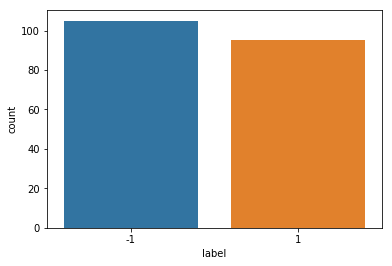

In [19]:
sns.countplot(test['label'])

In [20]:
X_test = test.iloc[:,1:]
Y_test = test.iloc[:, 0]

In [21]:
X_train, Y_train = train.iloc[:,1:], train.iloc[:,0].astype(int)
#print(y)

In [22]:
Y_train.shape

(600,)

In [23]:
def heuristic(a,b,z):
        i = z
        count=0
        while i == z and count<1000:
            i = random.randint(a,b)
            count=count+1
        return i

In [24]:
#def calc_b(X, Y, w):
def get_b(X, Y, i,j,Ei,Ej,alphaIold, alphaJold,alphas,b,C):
        #b_tmp = y - np.dot(w.T, X.T)
        #return np.mean(b_tmp)
        b1 = b - Ei- Y.iloc[i]*(alphas[i]-alphaIold)*kernel_linear(X.iloc[i,:],X.iloc[i,:]) - Y.iloc[j]*(alphas[j]-alphaJold)*kernel_linear(X.iloc[i,:],X.iloc[j,:])    
        b2 = b - Ej- Y.iloc[i]*(alphas[i]-alphaIold)*kernel_linear(X.iloc[i,:],X.iloc[j,:]) - Y.iloc[j]*(alphas[j]-alphaJold)*kernel_linear(X.iloc[j,:],X.iloc[j,:])
        if (0 < alphas[i]) and (C > alphas[i]):
            b = b1
        elif (0 < alphas[j]) and (C > alphas[j]):
            b = b2
        else:
            b = (b1 + b2)/2.0
        return b
        
def get_w(alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

In [25]:
def compute_L_H(C,alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    

In [26]:
def kernel_linear(x1, x2):
        return np.dot(x1, x2.T)
def kernel_quadratic(x1, x2):
        return (np.dot(x1, x2.T) ** 2)
def kernel_RBF(x1,x2):
        dist = np.linalg.norm(x1-x2)
        dist = dist**2
        return math.exp( -0.5*dist )

        

In [27]:

def h(X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
def E(x_k, y_k, w, b):
        return h(x_k, w, b) - y_k

In [28]:
def decision_function(alphas, target, X_train, x_test, b):
    """Applies the SVM decision function to the input feature vectors in `x_test`."""
    
    result = (alphas * target) @ kernel_linear(X_train, x_test) - b
    return result

In [29]:
def predict(X,w,b):
        return h(X, w, b)

In [30]:
def get_acc(y,y_hat):
    correct = 0
    total = 0
    
    for i in range(0,y.shape[0]):
        total = total+1
        if(y[i]==-1 and y_hat[i]==-1):
            correct = correct+1
        if(y[i]==1 and y_hat[i]==1):
            correct = correct+1
    acc = float(correct/total)
    return acc

In [31]:
Y_train.shape

(600,)

In [32]:
def f(alpha,Y_tr,x_i,X_tr,b,n):
    sum = 0
    for i in range (0,n):
        a1 = int(alpha[i])
        #print(a1)
        a2 = int(Y_tr.iloc[i])
        #print(a2)
        a3 = kernel_linear(X_tr.iloc[i,:],x_i)
        #print(a3)
        #sum += alpha[i]*Y_tr[i]*kernel_linear(X_tr[i],x_i)
        sum = sum + (a1*a2*a3)
    sum+=b
    return sum

In [33]:
x_1 = X_train.iloc[1,:]
x_2 = X_train.iloc[2,:]
ans = kernel_linear(x_1,x_2)
ans2 = int(ans)
print(ans2)

2780982


In [34]:
n, d = X_train.shape[0], X_train.shape[1]
alpha = np.zeros((n))
print(alpha.shape)
count = 0
C = 1.0
b = 0
epsilon=0.001
max_iter = 1000
while count<1:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = heuristic(0, n-1, j)

                x_i, x_j, y_i, y_j = X_train.iloc[i,:], X_train.iloc[j,:], Y_train.iloc[i], Y_train.iloc[j]

                eta = kernel_linear(x_i, x_i) + kernel_linear(x_j, x_j) - 2 * kernel_linear(x_i, x_j)

                if eta == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
   
                (L, H) = compute_L_H(C,alpha_prime_j, alpha_prime_i, y_j, y_i)
                fXi = f(alpha,Y_train,x_i,X_train,b,n)
                fXj = f(alpha,Y_train,x_j,X_train,b,n)
                Ei = fXi - float(y_i)
                Ej = fXj - float(y_j)

                b = get_b(X_train, Y_train, i,j,Ei,Ej,alpha_prime_i, alpha_prime_j,alpha,b,C)

                alpha[j] = alpha_prime_j + float(y_j * (Ei - Ej))/eta
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < epsilon:
                break

            if count >= max_iter:
                print("Iteration number exceeded the max of  iterations")
                break
        # Compute final model parameters
b = get_b(X_train, Y_train, i,j,Ei,Ej,alpha_prime_i, alpha_prime_j,alpha,b,C)
#if self.kernel_type == 'linear':
w = get_w(alpha, Y_train, X_train)
        # Get support vectors
alpha_idx = np.where(alpha > 0)[0]
support_vectors = X_train.iloc[alpha_idx, :]
#return support_vectors, count
sv_count = support_vectors.shape[0]

    # Make prediction



(600,)


Confusion Matrix [[89 16]
 [ 7 88]]
0.885


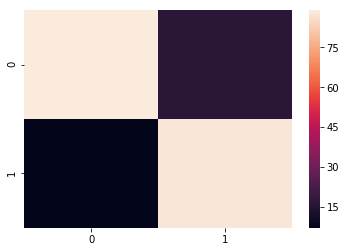

In [35]:
Y_predicted = predict(X_test,w,b)

Y_n_test= Y_test.values
cm = confusion_matrix(Y_n_test, Y_predicted)
print("Confusion Matrix",cm)
ax = sns.heatmap(confusion_matrix(Y_test, Y_predicted))
acc = get_acc(Y_n_test, Y_predicted)

print(acc)

**Analysis using ROC Curves**

In [36]:
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, Y_train).predict_proba(X_test)

In [37]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f",roc_auc)

Area under the ROC curve : %f 0.9937844611528822


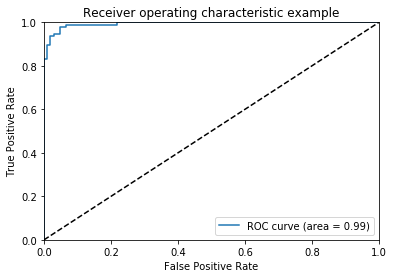

In [38]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [39]:
classifier = svm.SVC(C=1.0, kernel='poly', degree=2, gamma=2,probability=True)
probas_ = classifier.fit(X_train, Y_train).predict_proba(X_test)

In [40]:
fpr, tpr, thresholds = roc_curve(Y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f",roc_auc)

Area under the ROC curve : %f 0.9977944862155389


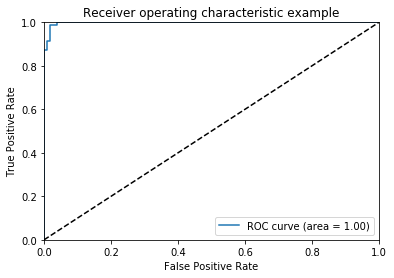

In [41]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()